## A notebook to seamlessly take blast output to GO Slim list

This is a notebook meant to run in a working directory. Please set working directory as variable in next cell

In [7]:
wd="/Volumes/block/wd/042120"


In [8]:
cd $wd

/Volumes/block/wd/042120


### In this directory you will need three files
1) blastout file in format `-6`    
2) Uniprot GO annotation file (340M) available here `http://owl.fish.washington.edu/halfshell/bu-alanine-wd/17-07-20/uniprot-SP-GO.sorted`    
3) GOslim file available here `http://owl.fish.washington.edu/halfshell/bu-alanine-wd/17-07-20/GO-GOslim.sorted`

In [9]:
!curl https://gannet.fish.washington.edu/Atumefaciens/20200408_cbai_diamond_blastx_megan/20200408.C_bairdi.megan.Trinity.blastx.outfmt6 \
-o 20200408.C_bairdi.megan.Trinity.blastx.outfmt6    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1997k  100 1997k    0     0  1274k      0  0:00:01  0:00:01 --:--:-- 1274k


In [10]:
!curl http://owl.fish.washington.edu/halfshell/bu-alanine-wd/17-07-20/uniprot-SP-GO.sorted -o uniprot-SP-GO.sorted

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  340M  100  340M    0     0  1406k      0  0:04:07  0:04:07 --:--:-- 1626k  15 53.8M    0     0  1574k      0  0:03:41  0:00:34  0:03:07 1846k0     0  1609k      0  0:03:36  0:00:44  0:02:52 1796k     0  0:03:44  0:01:33  0:02:11 1342k   45  154M    0     0  1550k      0  0:03:44  0:01:41  0:02:03 1728k  0     0  1549k      0  0:03:44  0:01:42  0:02:02 1702k    0  1564k      0  0:03:42  0:02:01  0:01:41 1620k 1542k      0  0:03:45  0:02:47  0:00:58 1523k0  274M    0     0  1422k      0  0:04:05  0:03:17  0:00:48  680k  1388k      0  0:04:10  0:03:52  0:00:18 1605k


In [11]:
!curl http://owl.fish.washington.edu/halfshell/bu-alanine-wd/17-07-20/GO-GOslim.sorted -o GO-GOslim.sorted

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2314k  100 2314k    0     0  1283k      0  0:00:01  0:00:01 --:--:-- 1283k


In [12]:
#checking if files in directory
!ls 

20200408.C_bairdi.megan.Trinity.blastx.outfmt6
GO-GOslim.sorted
uniprot-SP-GO.sorted


### Set blastout file as variable

In [13]:
blastout="20200408.C_bairdi.megan.Trinity.blastx.outfmt6"


# That should be the last thing you have to Type!

In [14]:
!head -2 $blastout

TRINITY_DN21551_c1_g1_i1	sp|Q5ZK63|TCP4_CHICK	45.1	71	38	1	410	201	56	126	1.2e-12	75.1
TRINITY_DN21560_c0_g1_i1	sp|Q56JU9|RS24_BOVIN	74.2	128	33	0	68	451	4	131	2.4e-44	179.9


In [15]:
#convert pipes to tab
!tr '|' '\t' < $blastout \
> _blast-sep.tab

In [16]:
!head -2 _blast-sep.tab

TRINITY_DN21551_c1_g1_i1	sp	Q5ZK63	TCP4_CHICK	45.1	71	38	1	410	201	56	126	1.2e-12	75.1
TRINITY_DN21560_c0_g1_i1	sp	Q56JU9	RS24_BOVIN	74.2	128	33	0	68	451	4	131	2.4e-44	179.9


In [28]:
#reducing number of columns and sorting 
!awk -v OFS='\t' '{print $3, $1, $13}' < _blast-sep.tab | sort \
> _blast-sort.tab

In [29]:
!head -2 _blast-sort.tab

A0A068FIK2	TRINITY_DN6827_c0_g1_i1	4.5e-30
A0A087WPF7	TRINITY_DN15151_c0_g1_i1	3.2e-06


In [27]:
!head -2 uniprot-SP-GO.sorted

A0A023GPI8	LECA_CANBL	reviewed	Lectin alpha chain (CboL) [Cleaved into: Lectin beta chain; Lectin gamma chain]		Canavalia boliviana	237			mannose binding [GO:0005537]; metal ion binding [GO:0046872]	mannose binding [GO:0005537]; metal ion binding [GO:0046872]	GO:0005537; GO:0046872
A0A023GPJ0	CDII_ENTCC	reviewed	Immunity protein CdiI	cdiI ECL_04450.1	Enterobacter cloacae subsp. cloacae (strain ATCC 13047 / DSM 30054 / NBRC 13535 / NCDC 279-56)	145					


In [30]:
#joining blast with uniprot annoation file and reducing to three columns UniprotID, Query, All GO terms
!join -t $'\t' \
_blast-sort.tab \
uniprot-SP-GO.sorted \
| cut -f1,2,14 \
> _blast-annot.tab

In [31]:
!head -2 _blast-annot.tab

A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0003777; GO:0005524; GO:0005737; GO:0007018; GO:0008017; GO:0055028; GO:0071555
A0A0F7YZI5	TRINITY_DN7195_c0_g1_i1	GO:0005179; GO:0005576


## The following is a script modidified from Sam

In [32]:
%%bash 

# This script was originally written to address a specific problem that Rhonda was having



# input_file is the initial, "problem" file
# file is an intermediate file that most of the program works upon
# output_file is the final file produced by the script
input_file="_blast-annot.tab"
file="_intermediate.file"
output_file="_blast-GO-unfolded.tab"

# sed command substitutes the "; " sequence to a tab and writes the new format to a new file.
# This character sequence is how the GO terms are delimited in their field.
sed $'s/; /\t/g' "$input_file" > "$file"

# Identify first field containing a GO term.
# Search file with grep for "GO:" and pipe to awk.
# Awk sets tab as field delimiter (-F'\t'), runs a for loop that looks for "GO:" (~/GO:/), and then prints the field number).
# Awk results are piped to sort, which sorts unique by number (-ug).
# Sort results are piped to head to retrieve the lowest value (i.e. the top of the list; "-n1").
begin_goterms=$(grep "GO:" "$file" | awk -F'\t' '{for (i=1;i<=NF;i++) if($i ~/GO:/) print i}' | sort -ug | head -n1)

# While loop to process each line of the input file.
while read -r line
	do
	
	# Send contents of the current line to awk.
	# Set the field separator as a tab (-F'\t') and print the number of fields in that line.
	# Save the results of the echo/awk pipe (i.e. number of fields) to the variable "max_field".
	max_field=$(echo "$line" | awk -F'\t' '{print NF}')

	# Send contents of current line to cut.
	# Cut fields (i.e. retain those fields) 1-12.
	# Save the results of the echo/cut pipe (i.e. fields 1-12) to the variable "fixed_fields"
	fixed_fields=$(echo "$line" | cut -f1-2)

	# Since not all the lines contain the same number of fields (e.g. may not have GO terms),
	# evaluate the number of fields in each line to determine how to handle current line.

	# If the value in max_field is less than the field number where the GO terms begin,
	# then just print the current line (%s) followed by a newline (\n).
	if (( "$max_field" < "$begin_goterms" ))
		then printf "%s\n" "$line"
			else

			# Send contents of current line (which contains GO terms) to cut.
			# Cut fields (i.e. retain those fields) 13 to whatever the last field is in the curent line.
			# Save the results of the echo/cut pipe (i.e. all the GO terms fields) to the variable "goterms".
			goterms=$(echo "$line" | cut -f"$begin_goterms"-"$max_field")
			
			# Assign values in the variable "goterms" to a new indexed array (called "array"), 
			# with tab delimiter (IFS=$'\t')
			IFS=$'\t' read -r -a array <<<"$goterms"
			
			# Iterate through each element of the array.
			# Print the first 12 fields (i.e. the fields stored in "fixed_fields") followed by a tab (%s\t).
			# Print the current element in the array (i.e. the current GO term) followed by a new line (%s\n).
			for element in "${!array[@]}"	
				do printf "%s\t%s\n" "$fixed_fields" "${array[$element]}"
			done
	fi

# Send the input file into the while loop and send the output to a file named "rhonda_fixed.txt".
done < "$file" > "$output_file"

In [33]:
!head _blast-GO-unfolded.tab

A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0003777
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0005524
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0005737
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0007018
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0008017
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0055028
A0A068FIK2	TRINITY_DN6827_c0_g1_i1	GO:0071555
A0A0F7YZI5	TRINITY_DN7195_c0_g1_i1	GO:0005179
A0A0F7YZI5	TRINITY_DN7195_c0_g1_i1	GO:0005576
A0A0F7Z3J2	TRINITY_DN25564_c0_g1_i1	GO:0005179


In [34]:
#gets rid of lines with no GOIDs
!sort -k3 _blast-GO-unfolded.tab | grep "GO:" > _blast-GO-unfolded.sorted

In [35]:
#joining files to get GOslim for each query (with duplicate GOslim / query removed)
!join -1 3 -2 1 -t $'\t' \
_blast-GO-unfolded.sorted \
GO-GOslim.sorted \
| uniq | awk -F'\t' -v OFS='\t' '{print $3, $1, $5, $6}' \
> Blastquery-GOslim.tab

In [36]:
!head Blastquery-GOslim.tab

TRINITY_DN4563_c0_g1_i1	GO:0000001	cell organization and biogenesis	P
TRINITY_DN2020_c0_g1_i5	GO:0000002	cell organization and biogenesis	P
TRINITY_DN4388_c0_g1_i3	GO:0000002	cell organization and biogenesis	P
TRINITY_DN4388_c0_g1_i4	GO:0000002	cell organization and biogenesis	P
TRINITY_DN4985_c0_g1_i1	GO:0000002	cell organization and biogenesis	P
TRINITY_DN22531_c0_g1_i1	GO:0000002	cell organization and biogenesis	P
TRINITY_DN4468_c0_g2_i1	GO:0000002	cell organization and biogenesis	P
TRINITY_DN9608_c0_g1_i1	GO:0000002	cell organization and biogenesis	P
TRINITY_DN14285_c0_g1_i1	GO:0000002	cell organization and biogenesis	P
TRINITY_DN1568_c1_g1_i14	GO:0000002	cell organization and biogenesis	P


In [50]:
!cat Blastquery-GOslim.tab | grep "	P"  | awk -F $'\t' '{print $4}' | sort | uniq -c

114708 P


In [102]:
!cat Blastquery-GOslim.tab | grep "	P" | awk -F $'\t' '{print $3}' | sort | uniq -c | sort -r 

8350 transport
8282 protein metabolism
6622 signal transduction
5317 stress response
4719 cell cycle and proliferation
2887 DNA metabolism
2093 death
20063 developmental processes
1701 cell-cell signaling
16874 other biological processes
14568 cell organization and biogenesis
1426 cell adhesion
11074 other metabolic processes
10732 RNA metabolism


In [52]:
!cat Blastquery-GOslim.tab | grep "	P" | awk -F $'\t' '{print $3}' | sort | uniq -c | sort -r > GOslim-P-pie.txt

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

In [112]:
!cat Blastquery-GOslim.tab | grep "	P" > JP-Blastquery-GOslim.tab

In [113]:
jslim = read_table("JP-Blastquery-GOslim.tab", # name of the data file
            #sep=",", # what character separates each column?
            # header=0, 
            usecols=[0,2, 3], names=['ID', 'GOterm', 'type'],       
            na_values=["", " "]) # what values should be considered "blank" values?

In [114]:
jslim.head()

,ID,GOterm,type
0,TRINITY_DN4563_c0_g1_i1,cell organization and biogenesis,P
1,TRINITY_DN2020_c0_g1_i5,cell organization and biogenesis,P
2,TRINITY_DN4388_c0_g1_i3,cell organization and biogenesis,P
3,TRINITY_DN4388_c0_g1_i4,cell organization and biogenesis,P
4,TRINITY_DN4985_c0_g1_i1,cell organization and biogenesis,P


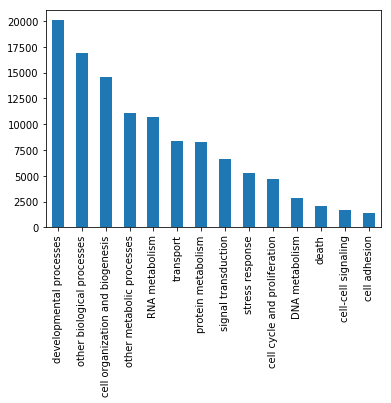

In [115]:
jslim['GOterm'].value_counts().plot(kind='bar');

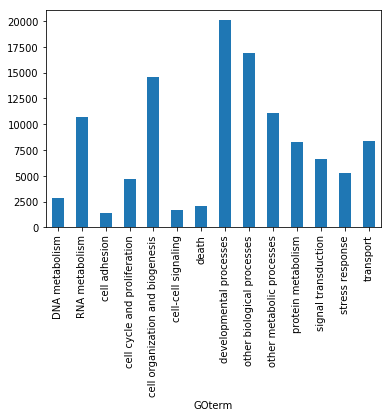

In [116]:
jslim = jslim.groupby(['GOterm'])['ID'].count()

jslim.plot.bar()